# 波士顿房价预测
经典的回归模型项目

## 1. 数据加载与观察
数据：housing.csv

### 1.1 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 加载数据

In [2]:
names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.csv", names=names, sep='\s+')
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 1.3 理解数据特征
![](img.png)

## 2. 数据可视化
（初步探索）

### 2.1 查看所有特征与房价的相关性

In [3]:
correlation = data.corr()['MEDV'].sort_values(ascending=False)
correlation

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### 2.2 绘制房间数与房价的关系

Text(0.5, 1.0, 'RM vs. MEDV')

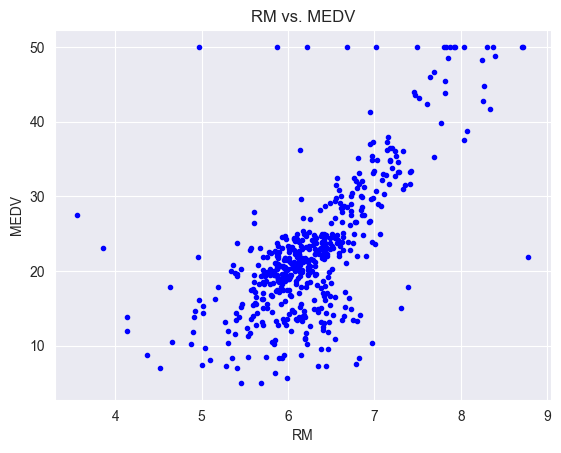

In [4]:
plt.plot(data['RM'], data['MEDV'], 'b.')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs. MEDV')

可以观察出 RM 与 MEDV 大致呈现正相关性

## 3. 数据预处理

In [5]:
np.random.seed(15)
# 洗牌
data_shuffle = np.random.permutation(data)
data_shuffle

array([[3.53700e-02, 3.40000e+01, 6.09000e+00, ..., 3.95750e+02,
        9.50000e+00, 2.20000e+01],
       [5.20140e-01, 2.00000e+01, 3.97000e+00, ..., 3.86860e+02,
        5.91000e+00, 4.88000e+01],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 3.96900e+02,
        1.46900e+01, 2.31000e+01],
       ...,
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 3.96900e+02,
        1.93700e+01, 1.25000e+01],
       [1.91330e-01, 2.20000e+01, 5.86000e+00, ..., 3.89130e+02,
        1.84600e+01, 1.85000e+01],
       [4.66883e+00, 0.00000e+00, 1.81000e+01, ..., 1.04800e+01,
        1.90100e+01, 1.27000e+01]])

### 3.1 选择高相关性特征
选择 abs(correlation) >= 0.5 的特征值

In [6]:
high_corr = correlation[correlation.abs() >= 0.5].index
high_corr

Index(['MEDV', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

In [7]:
m = len(data_shuffle)
index = [i for i in range(len(names)) if names[i] in high_corr][:-1]
high_corr_data = data_shuffle[:, index]
high_corr_data[:10]

array([[ 6.59 , 16.1  ,  9.5  ],
       [ 8.398, 13.   ,  5.91 ],
       [ 5.572, 16.6  , 14.69 ],
       [ 6.03 , 21.   ,  7.88 ],
       [ 6.715, 17.8  , 10.16 ],
       [ 4.906, 20.2  , 34.77 ],
       [ 5.404, 18.6  , 23.98 ],
       [ 5.155, 20.2  , 20.08 ],
       [ 6.606, 16.6  ,  7.37 ],
       [ 5.593, 19.1  , 12.5  ]])

In [8]:
target = data_shuffle[:, -1].reshape(m, 1)
target[:10]

array([[22. ],
       [48.8],
       [23.1],
       [11.9],
       [22.8],
       [13.8],
       [19.3],
       [16.3],
       [23.3],
       [17.6]])

### 3.2 标准化数据（提升模型收敛速度）

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
high_corr_data_scaler = scaler.fit_transform(high_corr_data)
high_corr_data_scaler[:10]

array([[ 0.43504177, -1.08911039, -0.4419768 ],
       [ 3.01082466, -2.52243411, -0.94520069],
       [-1.01526076, -0.85792914,  0.28552513],
       [-0.36276709,  1.17646583, -0.66905833],
       [ 0.6131241 , -0.30309415, -0.34946211],
       [-1.96408344,  0.80657583,  3.1002147 ],
       [-1.25460342,  0.06679585,  1.58773958],
       [-1.60934343,  0.80657583,  1.04106182],
       [ 0.45783631, -0.85792914, -0.74054696],
       [-0.98534293,  0.29797709, -0.02145545]])

## 4. 划分训练集与测试集

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(high_corr_data_scaler, target, test_size=0.2, random_state=15)
m1 = len(X_train)
m2 = len(X_test)
m1

404

## 5. 训练线性回归模型

#### 直接使用函数

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([[ 3.02107557, -2.06516576, -4.20876286]])

In [13]:
model.intercept_

array([22.63096568])

#### 梯度下降

##### 数据量小，首先尝试批量梯度下降

In [14]:
n_iterations = 10000
alpha = 0.01
theta = np.zeros((4, 1))
X_train_bias = np.c_[np.ones((m1, 1)), X_train]

for _ in range(n_iterations):
    gradient = (1/m1) * X_train_bias.T @ (X_train_bias @ theta - y_train)
    theta -= alpha * gradient
theta

array([[22.63096568],
       [ 3.02107557],
       [-2.06516576],
       [-4.20876286]])

*梯度下降结果与函数计算结果基本一致*

## 6. 模型评估

### 6.1 预测测试集

In [15]:
y_predict1 = model.predict(X_test)
y_predict2 = np.c_[np.ones((m2, 1)), X_test] @ theta

### 6.2 计算指标

In [16]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_predict1))

np.float64(4.627424649641221)

In [17]:
np.sqrt(mean_squared_error(y_test, y_predict2))

np.float64(4.627424649641194)

In [18]:
4.62 / (target.max() - target.min())

np.float64(0.10266666666666667)

*RMSE 为 4.62 表示模型大约有 10% 的房价误差*

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict1)

0.7053298549594789

In [20]:
r2_score(y_test, y_predict2)

0.7053298549594824

*R² 为 0.705 表示模型能解释 70.5% 的房价变化*

### 6.3 可视化预测结果

Text(0.5, 1.0, 'True vs Predicted Prices')

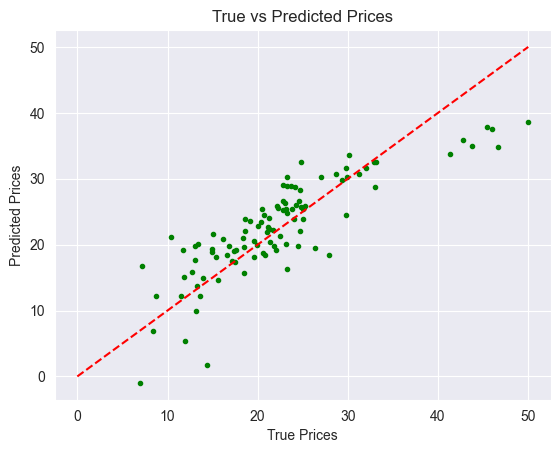

In [21]:
plt.plot(y_test, y_predict1, 'g.')
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')

*点越接近红色虚线，预测越准确*

## 7. 实际应用：预测新数据

In [22]:
data[high_corr][:10]

,MEDV,RM,PTRATIO,LSTAT
0,24.0,6.575,15.3,4.98
1,21.6,6.421,17.8,9.14
2,34.7,7.185,17.8,4.03
3,33.4,6.998,18.7,2.94
4,36.2,7.147,18.7,5.33
5,28.7,6.430,18.7,5.21
6,22.9,6.012,15.2,12.43
7,27.1,6.172,15.2,19.15
8,16.5,5.631,15.2,29.93
9,18.9,6.004,15.2,17.10


- MEDV 房价
- RM 房间数
- PTRATIO 城镇中教师学生比例
- LSTAT 地区有多少房东属于是低收入阶层

In [23]:
new_data = scaler.transform([[7, 10, 5]])
predicted_price = model.predict(new_data)
print(f"Predicted MEDV: ${predicted_price[0, 0] * 1000:.2f}")

Predicted MEDV: $38298.70


In [24]:
new_data = scaler.transform([[4, 20, 30]])
predicted_price = model.predict(new_data)
print(f"Predicted MEDV: ${predicted_price[0, 0] * 1000:.2f}")

Predicted MEDV: $1089.19


## 8. 优化方向

In [25]:
correlation

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### 8.1 增加更多特征
选择 abs(correlation) >= 0.45 的特征值

In [26]:
high_corr2 = correlation[correlation.abs() >= 0.45].index
high_corr2

Index(['MEDV', 'RM', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT'], dtype='object')

***获取数据***

In [27]:
index = [i for i in range(len(names)) if names[i] in high_corr2][:-1]
high_corr_data2 = data_shuffle[:, index]
high_corr_data2[:10]

array([[  6.09 ,   6.59 , 329.   ,  16.1  ,   9.5  ],
       [  3.97 ,   8.398, 264.   ,  13.   ,   5.91 ],
       [  4.05 ,   5.572, 296.   ,  16.6  ,  14.69 ],
       [ 11.93 ,   6.03 , 273.   ,  21.   ,   7.88 ],
       [ 10.01 ,   6.715, 432.   ,  17.8  ,  10.16 ],
       [ 18.1  ,   4.906, 666.   ,  20.2  ,  34.77 ],
       [ 10.59 ,   5.404, 277.   ,  18.6  ,  23.98 ],
       [ 18.1  ,   5.155, 666.   ,  20.2  ,  20.08 ],
       [  4.93 ,   6.606, 300.   ,  16.6  ,   7.37 ],
       [  5.86 ,   5.593, 330.   ,  19.1  ,  12.5  ]])

In [28]:
target

array([[22. ],
       [48.8],
       [23.1],
       [11.9],
       [22.8],
       [13.8],
       [19.3],
       [16.3],
       [23.3],
       [17.6],
       [18.1],
       [21.2],
       [17.5],
       [13.4],
       [22. ],
       [10.9],
       [ 7.2],
       [ 5. ],
       [20.6],
       [16.5],
       [43.5],
       [13.9],
       [20.8],
       [18. ],
       [20.4],
       [18.5],
       [22. ],
       [16.8],
       [19.6],
       [22.9],
       [23.3],
       [14.6],
       [19.8],
       [20.6],
       [24.4],
       [20.8],
       [21.7],
       [22.8],
       [13.1],
       [18.9],
       [42.8],
       [33.2],
       [16.7],
       [22.3],
       [29.8],
       [18.9],
       [18.8],
       [28.7],
       [23.1],
       [13.3],
       [35.4],
       [15.6],
       [13.1],
       [ 8.3],
       [19.6],
       [32.9],
       [ 8.5],
       [25. ],
       [13.3],
       [22. ],
       [13.8],
       [36.2],
       [19.5],
       [24.3],
       [32. ],
       [19.3],
       [23

***查看线性关系***

Text(0.5, 1.04, 'Scatter matrix')

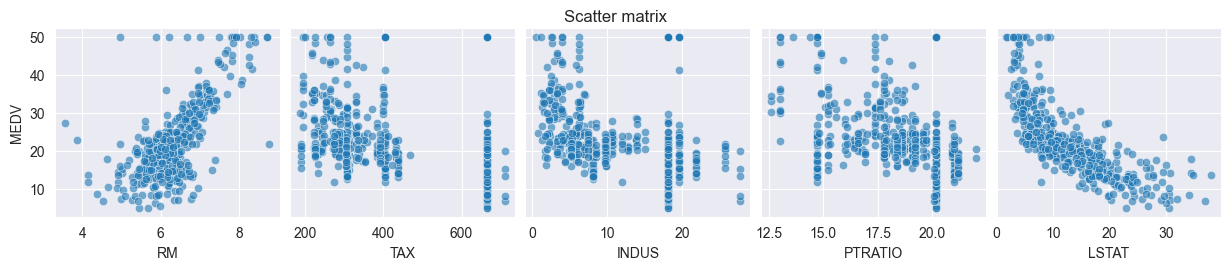

In [29]:
import seaborn as sns
data_index = high_corr2.drop('MEDV')
matrix = sns.pairplot(data[high_corr2], x_vars=data_index, y_vars=['MEDV'], plot_kws={'alpha': 0.6})
plt.suptitle('Scatter matrix', y=1.04)

*较为明显的是 RM 存在线性关系，而 LSTAT 存在非线性关系*  
***做线性与多项式进一步对比确认***

### 8.2 尝试线性关系

***标准化***

In [30]:
scaler2 = StandardScaler()
high_corr_data_scaler2 = scaler2.fit_transform(high_corr_data2)
high_corr_data_scaler2[:10]

array([[-0.73637217,  0.43504177, -0.47061187, -1.08911039, -0.4419768 ],
       [-1.04569998,  3.01082466, -0.85666526, -2.52243411, -0.94520069],
       [-1.03402724, -1.01526076, -0.66660821, -0.85792914,  0.28552513],
       [ 0.11573841, -0.36276709, -0.80321172,  1.17646583, -0.66905833],
       [-0.16440754,  0.6131241 ,  0.14113426, -0.30309415, -0.34946211],
       [ 1.01599907, -1.96408344,  1.53092646,  0.80657583,  3.1002147 ],
       [-0.07978012, -1.25460342, -0.77945458,  0.06679585,  1.58773958],
       [ 1.01599907, -1.60934343,  1.53092646,  0.80657583,  1.04106182],
       [-0.90562701,  0.45783631, -0.64285108, -0.85792914, -0.74054696],
       [-0.76993132, -0.98534293, -0.46467259,  0.29797709, -0.02145545]])

***切分数据集***

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(high_corr_data_scaler2, target, test_size=0.2, random_state=15)
m1 = len(X_train2)
m2 = len(X_test2)
m1

404

***直接使用函数***

In [32]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [33]:
model2.coef_

array([[ 0.32281134,  3.07383714, -0.44500618, -1.9863877 , -4.16123877]])

In [34]:
model2.intercept_

array([22.62824151])

***梯度下降***

In [35]:
theta_add = np.zeros((6, 1))
X_train2_bias = np.c_[np.ones((m1, 1)), X_train2]

for _ in range(n_iterations):
    gradient = (1/m1) * X_train2_bias.T @ (X_train2_bias @ theta_add - y_train2)
    theta_add -= alpha * gradient
theta_add

array([[22.62824151],
       [ 0.32281134],
       [ 3.07383714],
       [-0.44500618],
       [-1.9863877 ],
       [-4.16123877]])

*函数与梯度下降仍然基本一致*

***模型评估***

In [36]:
y_predict1_add = model2.predict(X_test2)
y_predict2_add = np.c_[np.ones((m2, 1)), X_test2] @ theta_add

In [37]:
np.sqrt(mean_squared_error(y_test2, y_predict1_add))

np.float64(4.590826961735109)

In [38]:
np.sqrt(mean_squared_error(y_test2, y_predict2_add))

np.float64(4.5908269617351465)

In [39]:
4.59 / (target.max() - target.min())

np.float64(0.102)

*大约 10% 的房价误差，相较于未增加特征项时降低极少*

In [40]:
r2_score(y_test2, y_predict1_add)

0.7099724374890547

In [41]:
r2_score(y_test2, y_predict2_add)

0.70997243748905

*能解释 71% 的房价变化，相较于未增加特征项时只增加了 0.5%*

### 8.3 尝试非线性关系

***多项式回归***

*重新构建数据*

In [42]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(high_corr_data2, target, test_size=0.2, random_state=15)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline([
    # 当include_bias=True 时可用在梯度下降中，自动增加一列全为 1 项
    ('PolynomialFeatures', PolynomialFeatures(degree=3, include_bias=False)), 
    ('StandardScaler', StandardScaler()), 
    ('LinearRegression', LinearRegression())
])
pipeline.fit(X_train3, y_train3)

Pipeline(steps=[('PolynomialFeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('StandardScaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

In [44]:
y_predict3 = pipeline.predict(X_test3)
np.sqrt(mean_squared_error(y_test3, y_predict3))

np.float64(3.251317099856098)

In [45]:
3.25 / (target.max() - target.min())

np.float64(0.07222222222222222)

*房价误差大约为 7% ，相较于未增加特征项时降低了 3%*

***相较于增加特征项后的线性降低了 2.5%***

In [46]:
r2_score(y_test3, y_predict3)

0.8545291147106131

*能解释 85.5% 的房价变化，相较于未增加特征项时提升了 15%*

***相较于增加特征项后的线性提升了 14.5%***

***增加多项式特征提升了模型的复杂度，使其更贴合训练数据的结构，从而降低了RMSE并提高了R²***

### 8.4 分析误差来源

(np.float64(-5.0), np.float64(50.0), np.float64(-15.0), np.float64(15.0))

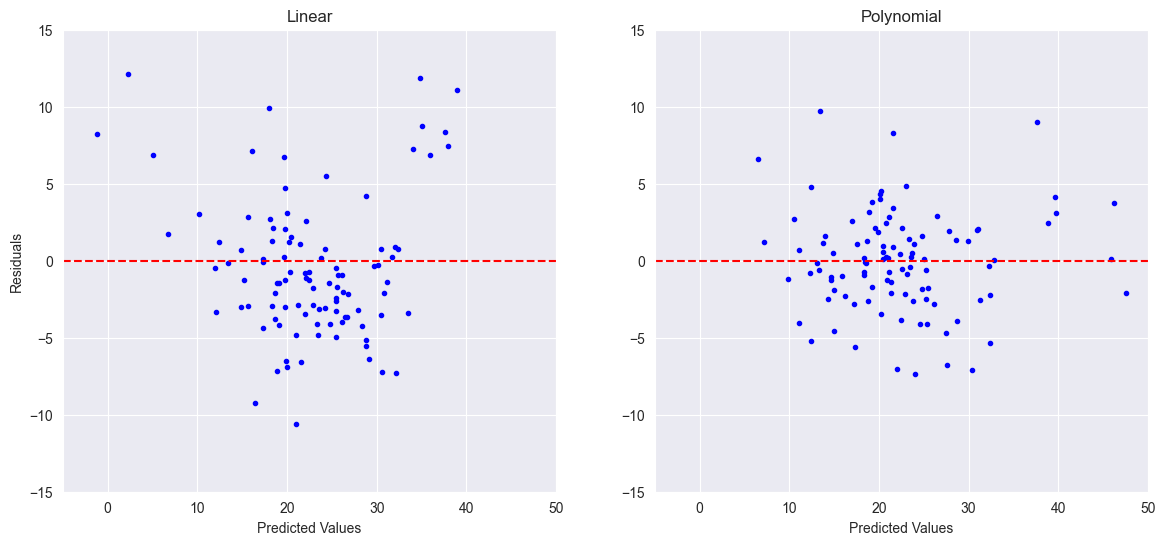

In [47]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
residuals1 = y_test2 - y_predict1_add
plt.plot(y_predict1_add, residuals1, 'b.')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear')
plt.axis((-5, 50, -15, 15))

plt.subplot(122)
residuals2 = y_test3 - y_predict3
plt.plot(y_predict3, residuals2, 'b.')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.title('Polynomial')
plt.axis((-5, 50, -15, 15))

*Linear 更发散，Polynomial 更收敛*

### 8.5 其他优化尝试

#### 将 LSTAT 转换为线性进行线性回归

*取数*

In [48]:
index = [i for i in range(len(names)) if names[i] in high_corr][:-1]
high_corr_data3 = data_shuffle[:, index]
high_corr_data3[:10]

array([[ 6.59 , 16.1  ,  9.5  ],
       [ 8.398, 13.   ,  5.91 ],
       [ 5.572, 16.6  , 14.69 ],
       [ 6.03 , 21.   ,  7.88 ],
       [ 6.715, 17.8  , 10.16 ],
       [ 4.906, 20.2  , 34.77 ],
       [ 5.404, 18.6  , 23.98 ],
       [ 5.155, 20.2  , 20.08 ],
       [ 6.606, 16.6  ,  7.37 ],
       [ 5.593, 19.1  , 12.5  ]])

*将 LSTAT 转换为线性*

In [49]:
new = 1 / high_corr_data3[:, -1]
high_corr_data_new = np.c_[high_corr_data3[:, :2], new]
high_corr_data_new[:10]

array([[ 6.59      , 16.1       ,  0.10526316],
       [ 8.398     , 13.        ,  0.16920474],
       [ 5.572     , 16.6       ,  0.06807352],
       [ 6.03      , 21.        ,  0.12690355],
       [ 6.715     , 17.8       ,  0.0984252 ],
       [ 4.906     , 20.2       ,  0.02876043],
       [ 5.404     , 18.6       ,  0.04170142],
       [ 5.155     , 20.2       ,  0.0498008 ],
       [ 6.606     , 16.6       ,  0.13568521],
       [ 5.593     , 19.1       ,  0.08      ]])

*标准化*

In [50]:
scaler3 = StandardScaler()
high_corr_data_new_scaler = scaler3.fit_transform(high_corr_data_new)
high_corr_data_new_scaler[:10]

array([[ 0.43504177, -1.08911039, -0.09751683],
       [ 3.01082466, -2.52243411,  0.73047619],
       [-1.01526076, -0.85792914, -0.5790933 ],
       [-0.36276709,  1.17646583,  0.18270922],
       [ 0.6131241 , -0.30309415, -0.18606303],
       [-1.96408344,  0.80657583, -1.08816685],
       [-1.25460342,  0.06679585, -0.92059121],
       [-1.60934343,  0.80657583, -0.81571065],
       [ 0.45783631, -0.85792914,  0.29642475],
       [-0.98534293,  0.29797709, -0.42465479]])

*切分数据集*

In [51]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(high_corr_data_new_scaler, target, test_size=0.2, random_state=15)

*直接使用函数*

In [52]:
model3 = LinearRegression()
model3.fit(X_train_new, y_train_new)

LinearRegression()

In [53]:
model3.coef_

array([[ 2.57574508, -1.86897407,  4.83990781]])

In [54]:
model3.intercept_

array([22.59409013])

*模型评估*

In [55]:
y_predict_new = model3.predict(X_test_new)
np.sqrt(mean_squared_error(y_test_new, y_predict_new))

np.float64(4.120550012823165)

In [56]:
4.12 / (target.max() - target.min())

np.float64(0.09155555555555556)

In [57]:
r2_score(y_test_new, y_predict_new)

0.7663489134600246

房价误差大约为 9.1%，相较于最开始的模型降低 1%

能解释大约 76.6% 的房价变化，相较于最开始的模型提高 6%

***对比多特征多项式优化较少***

#### 尝试直接使用多项式

In [58]:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(high_corr_data_new, target, test_size=0.2, random_state=15)

In [59]:
from sklearn.linear_model import Ridge
pipeline2 = Pipeline([
    # 当include_bias=True 时可用在梯度下降中，自动增加一列全为 1 项
    ('PolynomialFeatures', PolynomialFeatures(degree=12, include_bias=False)), 
    ('StandardScaler', StandardScaler()), 
    ('LinearRegression', Ridge())
])
pipeline2.fit(X_train_new2, y_train_new2)

Pipeline(steps=[('PolynomialFeatures',
                 PolynomialFeatures(degree=12, include_bias=False)),
                ('StandardScaler', StandardScaler()),
                ('LinearRegression', Ridge())])

In [60]:
y_predict_new2 = pipeline2.predict(X_test_new2)
np.sqrt(mean_squared_error(y_test_new2, y_predict_new2))

np.float64(3.3002457442939477)

In [61]:
3.30 / (target.max() - target.min())

np.float64(0.07333333333333333)

In [62]:
r2_score(y_test_new2, y_predict_new2)

0.8501178256127857

房价误差大约为 7.3%，相较于最开始的模型降低 3.7%

能解释大约 85% 的房价变化，相较于最开始的模型提高 14.5%

#### degree=12 有过拟合风险，需进行交叉验证

In [63]:
def polynomial_regression(train_data, target_data, val_data):
    pipeline_val = Pipeline([
        ('PolynomialFeatures', PolynomialFeatures(degree=12, include_bias=False)), 
        ('StandardScaler', StandardScaler()), 
        ('LinearRegression', Ridge())
    ])
    pipeline_val.fit(train_data, target_data)
    return pipeline_val.predict(val_data)

In [64]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=15)

mse_result = []
r2_result = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_new2, y_train_new2)):
    X_fold_train, y_fold_train = X_train_new2[train_idx], y_train_new2[train_idx]
    X_val, y_val = X_train_new2[val_idx], y_train_new2[val_idx]
    y_val_predict = polynomial_regression(X_fold_train, y_fold_train, X_val)
    mse_result.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    r2_result.append(r2_score(y_val, y_val_predict))

In [65]:
sum(mse_result) / 10

np.float64(5.635728794857327)

In [66]:
sum(r2_result) / 10

0.46012499964060816

*RMSE 增大且 R2 降低 :* ***过拟合***

修改参数后，当 degree = 3 时效果最好，RMSE = 4.49，R2 = 0.75

## 9. 项目总结

### 背景：
正在学习 **机器学习** ，最开始接触的是线性回归和多项式回归，因此选择了经典的 **波士顿房价预测** 作为项目练习

### 描述：
该项目使用 **线性回归模型 (含梯度下降)** 和 **多项式回归模型** ，采用 **RMSE**、**R2** 和 **交叉验证** 多种模型评估方式进行验证

### 结论：
通过预测波士顿房价，可以得出 **RM**, **TAX**, **INDUS**, **PTRATIO**, **LSTAT** 这五种特征值对房价具有一定的影响

最终采用的多项式回归模型拟合效果最好，**RMSE = 7%**，**R2 = 85.5%**

### 缺陷：
- 模型构建较为生疏，代码较为粗糙
- 思考过程可能未涉及全面
- 可视化部分较少，可能影响观察和判断